In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from matplotlib.pyplot import figure
sns.set()

In [2]:
df= pd.read_csv("BANCOS_B2.csv", encoding="latin1", sep=";")

In [3]:
#transformar data em index de data
df['data'] = pd.to_datetime(df['data'], format="%Y%m")
#df.set_index("data",inplace=True, drop=True)

In [4]:
#Arrumar valores separados por virgula
df['valor']= df['valor'].str.replace(",", ".")
df['valor'] = pd.to_numeric(df['valor'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70770 entries, 0 to 70769
Data columns (total 5 columns):
data        70770 non-null datetime64[ns]
id_banco    70770 non-null int64
nome        70770 non-null object
variavel    70770 non-null object
valor       70770 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [6]:
df.head(13)

,data,id_banco,nome,variavel,valor
0,2000-01-01,51262,DAIMLERCHRYSLER,IF.DATA_Capt,7.026241e+08
1,2000-01-01,51262,DAIMLERCHRYSLER,IF.DATA_DCap,-3.580450e+06
2,2000-01-01,51262,DAIMLERCHRYSLER,IF.DATA_JCP,0.000000e+00
3,2000-01-01,51262,DAIMLERCHRYSLER,IF.DATA_OpC,2.043372e+08
4,2000-01-01,51262,DAIMLERCHRYSLER,IF.DATA_PartLuc,0.000000e+00
5,2000-01-01,51262,DAIMLERCHRYSLER,IF.DATA_RdOC,3.270653e+06
6,2000-01-01,51396,HONDA,IF.DATA_Capt,0.000000e+00
7,2000-01-01,51396,HONDA,IF.DATA_DCap,0.000000e+00
8,2000-01-01,51396,HONDA,IF.DATA_JCP,0.000000e+00
9,2000-01-01,51396,HONDA,IF.DATA_OpC,0.000000e+00


<h1 style="color: red">Quantidade Nomes Diferentes:</h1>

In [7]:
nomes = df['nome'].drop_duplicates().reset_index(drop=True)
nomes.count()
#nomes[1]

131

## Últimos Nomes

In [8]:
#df[['id_banco','nome']].drop_duplicates().reset_index(drop=True)
ultimos_nomes = df[df['data'].dt.year == 2019][['id_banco','nome']]
ultimos_nomes.drop_duplicates().count()

id_banco    67
nome        67
dtype: int64

<h1 style="color: red">Quantidade de Identificadores das IFs</h1>

In [9]:
ids= df['id_banco'].drop_duplicates().reset_index(drop=True)
ids.count()

65

In [10]:
par_nome_id_banco = df[['nome','id_banco']].drop_duplicates()
par_nome_id_banco[par_nome_id_banco['nome']== 'CECM DOS MEDICOS DE CHAPECO LTDA']
def get_id_banco(nome):
    id = par_nome_id_banco[par_nome_id_banco['nome']== nome]['id_banco']
    return id.values[0]
#get_id_banco('FIAT')

<h1 style="color: red">Nossa conta vai levar em consideração a IF pelo nome (556) ou pelo identificador (100)
que eu imagino que seja o grupo?</h1>

<h1 style="color: red">Olha a quantidade de nomes diferentes por identificador:</h1>

[[]]

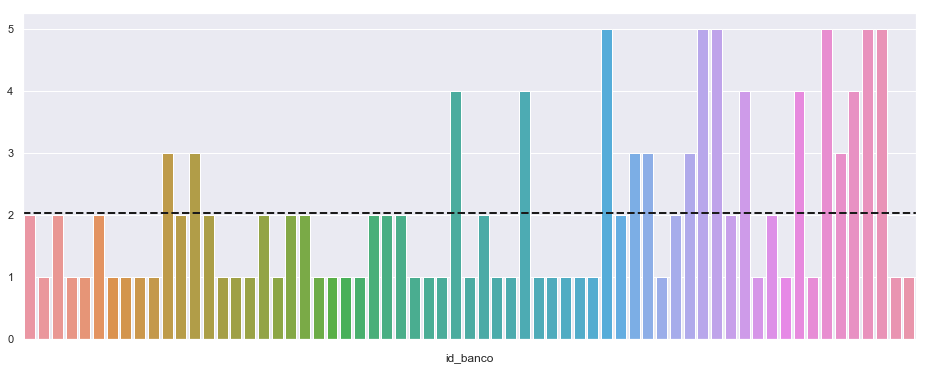

In [11]:
unique_names = df[['id_banco','nome']].drop_duplicates()
unique_names.sort_values(by=['id_banco'], inplace=True)
unique_names
#10 6 9 3
figure(figsize=(16, 6))
x = unique_names.groupby('id_banco').count().index
y = unique_names.groupby('id_banco').count().values.reshape(-1,)
g0=sns.barplot(x, y)
plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=2)
g0.set(xticklabels=[])

# Variáveis

In [12]:
df['variavel'].drop_duplicates()

0       IF.DATA_Capt
1       IF.DATA_DCap
2        IF.DATA_JCP
3        IF.DATA_OpC
4    IF.DATA_PartLuc
5       IF.DATA_RdOC
Name: variavel, dtype: object

<ul>
    <li>RdOC: Receitas com operações de crédito</li>
    <li>OpC: Operações de crédito</li>
    <li>Capt: Captações</li>
    <li>Dcap: Despesas de captação de crédito</li>
    <li>JCP: juro sobre capital próprio</li>
    <li>PartLuc: sobra líquida</li>
    <li style="color:red">OpCmed: média entre o mês no ano e o mesmo mês do ano anterior</li>
</ul>

<h1 style="color: red">Está correto dizer que a fórmula é a seguinte?</h1>

<h2 style="color:green">
$spread_{coop}=\left(\frac{RdOC_{t}}{\frac{OpC_{t}+OpC_{t-12}}{2}}\right)-
\left(\frac{DCap_{t}}{\frac{Capt_{t}+Capt_{t-12}}{2}}\right) - 
\left(\frac{PartLuc_{t} + JCP_{t}} 
{\frac {\left(\frac{OpC_{t} + OpC_{t - 12}}{2}\right)-\left(\frac{Capt_{t} + Capt_{t-12}}{2}\right)}{2}}\right)$
</h2>

<h1 style="color: red">Na imagem que tu tinhas mandado esse termo:
    $\left(
        \frac
            {SobraLiq_{i} + JCP_{t}}
            {
                \frac
                    {OpC_{med} - Capt_{med}}
                    {2}
            }
    \right)$<br>
    tem um 'i' que não deu pra entender o que é.
</h1>

<h1 style="color: red">Pelo que eu entendi do teu comentário o termo $OpC_{med}$ e $Capt_{med}$ seriam:</h1>

<h1 style="color: green">$OpC_{med} = \frac{OpC_{t} + OpC_{t - 12}}{2}$<h1>

<h1 style="color: green">$Capt_{med}= \frac{Capt_{t} + Capt_{t-12}}{2}$</h1>

<h1 style="color: red">Já que se tratam de médias entre meses com um ano de diferença.</h1>

In [13]:
ids[0]

51262

In [14]:
df[df['id_banco']==ids[0]][['nome','id_banco']].drop_duplicates()

,nome,id_banco
0,DAIMLERCHRYSLER,51262
25116,MERCEDES-BENZ,51262


# Pivot

## Pivot pelo nome

def pivot_IF(nome_IF):
    pivot = df[df['nome']== nome_IF].pivot(index='data', columns='variavel',values='valor')
    pivot['OpC_off_1'] = pivot['IF.DATA_OpC'].shift(1)
    pivot['OpC_off_12'] = pivot['IF.DATA_OpC'].shift(12)
    pivot['Capt_off_1'] = pivot['IF.DATA_Capt'].shift(1)
    pivot['Capt_off_12'] = pivot['IF.DATA_Capt'].shift(12)
    pivot['taxApl'] = pivot['IF.DATA_RdOC'] / ((pivot['IF.DATA_OpC'] + pivot['OpC_off_1'])/2)
    pivot['taxCapt'] = pivot['IF.DATA_DCap'] / ((pivot['IF.DATA_Capt'] + pivot['Capt_off_1'])/2)
    pivot['spread_banc'] = pivot['taxApl'] +  pivot['taxCapt'] # a captação tem sinal negativo
    cols=['spread_banc','taxApl','taxCapt','IF.DATA_DCap', 'IF.DATA_JCP','IF.DATA_PartLuc', 'IF.DATA_RdOC',
     'IF.DATA_OpC','OpC_off_1', 'OpC_off_12',
     'IF.DATA_Capt', 'Capt_off_1', 'Capt_off_12']
    return pivot[cols]
pivot_IF(nomes[0])

## Pivot pelo id

In [15]:
pd.Series([-1,-2,-3]).sum()

-6

<h2 style="color:green">
<p>t é o ano</p>
$spread_{coop}=\left(\frac{RdOC_{t}}{\frac{OpC_{t}+OpC_{t-1}}{2}}\right)-
\left(\frac{DCap_{t}}{\frac{Capt_{t}+Capt_{t-1}}{2}}\right) - 
\left(\frac{PartLuc_{t} + JCP_{t}} 
{\frac {\left(\frac{OpC_{t} + OpC_{t - 1}}{2}\right)-\left(\frac{Capt_{t} + Capt_{t-1}}{2}\right)}{2}}\right)$
</h2>

<h2 style="color:green">
$
se \left(\frac{OpC_{t} + OpC_{t - 1}}{2}\right) > \left(\frac{Capt_{t} + Capt_{t-1}}{2}\right)
$
    <br><br>
$
\left(\frac{PartLuc_{t} + JCP_{t}}
{\frac {\left(\frac{OpC_{t} + OpC_{t - 1}}{2}\right)-\left(\frac{Capt_{t} + Capt_{t-1}}{2}\right)}{2}}\right)$
será negativo
    <br><br>
Do contrário, teremos um número positivo e, portanto, um spread na cooperativa menor que o cálculo do spread bancário.
</h2>

In [16]:
ids[0]

51262

In [17]:
def pivot_IF(id):
    #print(id)
    pivot = df[df['id_banco']== id].pivot(index='data', columns='variavel',values='valor')
    pivot = pivot.groupby(pivot.index.year).sum()
    pivot['id'] = id
    pivot['OpC_off_1'] = pivot['IF.DATA_OpC'].shift(1)
    #pivot['OpC_off_12'] = pivot['IF.DATA_OpC'].shift(12)
    pivot['Capt_off_1'] = pivot['IF.DATA_Capt'].shift(1)
    #pivot['Capt_off_12'] = pivot['IF.DATA_Capt'].shift(12)
    pivot['taxApl'] = pivot['IF.DATA_RdOC'] / ((pivot['IF.DATA_OpC'] + pivot['OpC_off_1'])/2)
    pivot['taxCapt'] = pivot['IF.DATA_DCap'] / ((pivot['IF.DATA_Capt'] + pivot['Capt_off_1'])/2)
    pivot['spread_banc'] = pivot['taxApl'] +  pivot['taxCapt'] # a captação tem sinal negativo
    # termo coop é negativo se a media de operações de crédito for maior que
    # a média de captação 
    cols=['id','spread_banc', 'taxApl','taxCapt','IF.DATA_DCap', 'IF.DATA_RdOC',
     'IF.DATA_OpC','OpC_off_1', 'IF.DATA_Capt', 'Capt_off_1']
    return pivot[cols]
pivot_IF(ids[0])

variavel,id,spread_banc,taxApl,taxCapt,IF.DATA_DCap,IF.DATA_RdOC,IF.DATA_OpC,OpC_off_1,IF.DATA_Capt,Capt_off_1
data,,,,,,,,,,
2000,51262,NaN,NaN,NaN,-1.729596e+08,1.979055e+08,4.187463e+09,NaN,9.511334e+09,NaN
2001,51262,0.037914,0.061882,-0.023968,-2.593314e+08,3.723846e+08,7.847867e+09,4.187463e+09,1.212885e+10,9.511334e+09
2002,51262,0.043974,0.055916,-0.011943,-1.396134e+08,4.803954e+08,9.334737e+09,7.847867e+09,1.125141e+10,1.212885e+10
2003,51262,0.057963,0.058555,-0.000592,-6.626285e+06,5.988841e+08,1.112065e+10,9.334737e+09,1.113968e+10,1.125141e+10
2004,51262,0.055322,0.059124,-0.003801,-4.959922e+07,8.367596e+08,1.718480e+10,1.112065e+10,1.495506e+10,1.113968e+10
2005,51262,0.042993,0.054907,-0.011914,-2.227037e+08,1.136769e+09,2.422232e+10,1.718480e+10,2.242882e+10,1.495506e+10
2006,51262,0.025355,0.034018,-0.008663,-2.119387e+08,8.579590e+08,2.621867e+10,2.422232e+10,2.649987e+10,2.242882e+10
2007,51262,0.021112,0.034143,-0.013031,-3.679246e+08,8.678642e+08,2.461855e+10,2.621867e+10,2.996818e+10,2.649987e+10
2008,51262,0.020690,0.033321,-0.012631,-4.490806e+08,9.434243e+08,3.200785e+10,2.461855e+10,4.113941e+10,2.996818e+10


In [18]:
test_if = pivot_IF(ids[1])
test_if.columns

Index(['id', 'spread_banc', 'taxApl', 'taxCapt', 'IF.DATA_DCap',
       'IF.DATA_RdOC', 'IF.DATA_OpC', 'OpC_off_1', 'IF.DATA_Capt',
       'Capt_off_1'],
      dtype='object', name='variavel')

In [19]:
def monta_csv():
    cols=['id','spread_banc', 'taxApl','taxCapt','IF.DATA_DCap', 'IF.DATA_RdOC',
     'IF.DATA_OpC','OpC_off_1', 'IF.DATA_Capt', 'Capt_off_1']
    total = pd.DataFrame(columns=cols)
    for n in ids:
        total = total.append(pivot_IF(n))
    return total
completo = monta_csv()
#completo.to_csv("arrumado_b2.csv", encoding="latin1", sep=";")

In [20]:
ids.count()

65

In [21]:
len(completo['id'].unique())

65

In [22]:
completo[completo['id']== ids[0]]

variavel,id,spread_banc,taxApl,taxCapt,IF.DATA_DCap,IF.DATA_RdOC,IF.DATA_OpC,OpC_off_1,IF.DATA_Capt,Capt_off_1
2000,51262,NaN,NaN,NaN,-1.729596e+08,1.979055e+08,4.187463e+09,NaN,9.511334e+09,NaN
2001,51262,0.037914,0.061882,-0.023968,-2.593314e+08,3.723846e+08,7.847867e+09,4.187463e+09,1.212885e+10,9.511334e+09
2002,51262,0.043974,0.055916,-0.011943,-1.396134e+08,4.803954e+08,9.334737e+09,7.847867e+09,1.125141e+10,1.212885e+10
2003,51262,0.057963,0.058555,-0.000592,-6.626285e+06,5.988841e+08,1.112065e+10,9.334737e+09,1.113968e+10,1.125141e+10
2004,51262,0.055322,0.059124,-0.003801,-4.959922e+07,8.367596e+08,1.718480e+10,1.112065e+10,1.495506e+10,1.113968e+10
2005,51262,0.042993,0.054907,-0.011914,-2.227037e+08,1.136769e+09,2.422232e+10,1.718480e+10,2.242882e+10,1.495506e+10
2006,51262,0.025355,0.034018,-0.008663,-2.119387e+08,8.579590e+08,2.621867e+10,2.422232e+10,2.649987e+10,2.242882e+10
2007,51262,0.021112,0.034143,-0.013031,-3.679246e+08,8.678642e+08,2.461855e+10,2.621867e+10,2.996818e+10,2.649987e+10
2008,51262,0.020690,0.033321,-0.012631,-4.490806e+08,9.434243e+08,3.200785e+10,2.461855e+10,4.113941e+10,2.996818e+10
2009,51262,0.022881,0.032680,-0.009798,-4.650663e+08,1.270935e+09,4.577303e+10,3.200785e+10,5.378779e+10,4.113941e+10


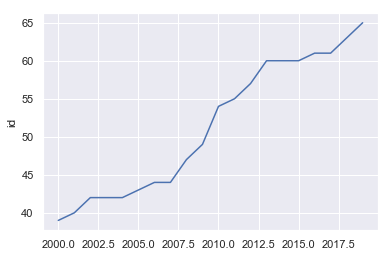

In [23]:
sns.lineplot(completo.index.unique(), completo.id.groupby(completo.index).count())

In [37]:
completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 2000 to 2019
Data columns (total 10 columns):
id              1028 non-null object
spread_banc     701 non-null float64
taxApl          776 non-null float64
taxCapt         810 non-null float64
IF.DATA_DCap    1028 non-null float64
IF.DATA_RdOC    1028 non-null float64
IF.DATA_OpC     1028 non-null float64
OpC_off_1       963 non-null float64
IF.DATA_Capt    1028 non-null float64
Capt_off_1      963 non-null float64
dtypes: float64(9), object(1)
memory usage: 128.3+ KB


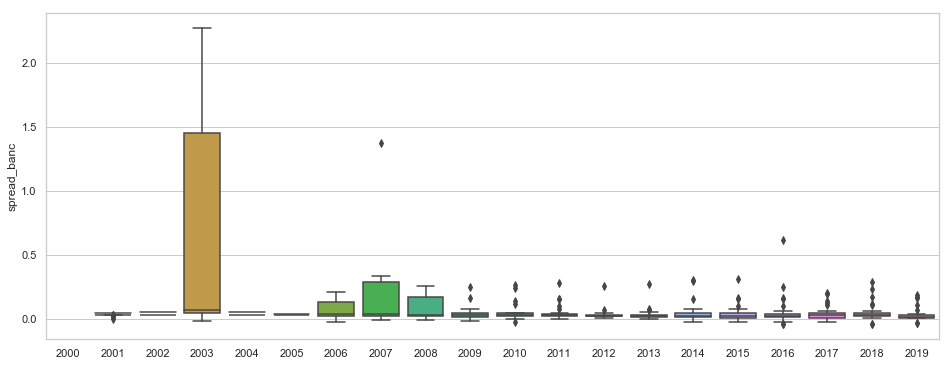

In [38]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
sns.boxplot(completo.index,completo.spread_banc)

In [43]:
filtrado = completo[(completo.spread_banc.notna()) & 
                      (completo.spread_banc != np.inf) &
                     (completo.spread_banc != -np.inf)
                    & (completo.spread_banc < .2)]

In [46]:
filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 2001 to 2019
Data columns (total 10 columns):
id              578 non-null object
spread_banc     578 non-null float64
taxApl          578 non-null float64
taxCapt         578 non-null float64
IF.DATA_DCap    578 non-null float64
IF.DATA_RdOC    578 non-null float64
IF.DATA_OpC     578 non-null float64
OpC_off_1       578 non-null float64
IF.DATA_Capt    578 non-null float64
Capt_off_1      578 non-null float64
dtypes: float64(9), object(1)
memory usage: 69.7+ KB


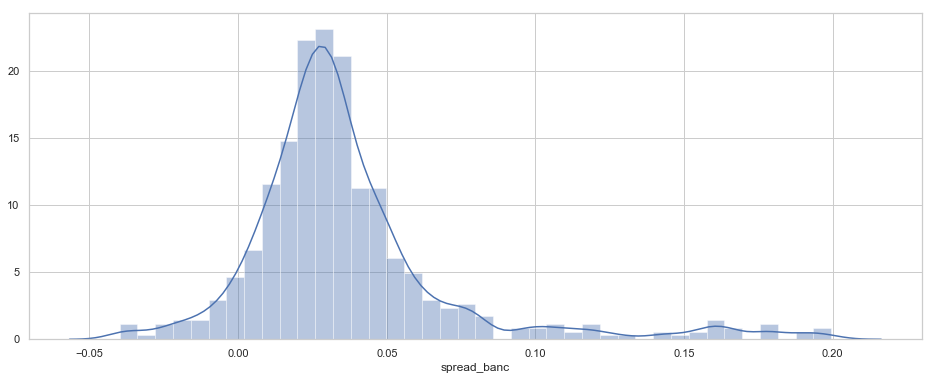

In [49]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
sns.distplot(filtrado.spread_banc)

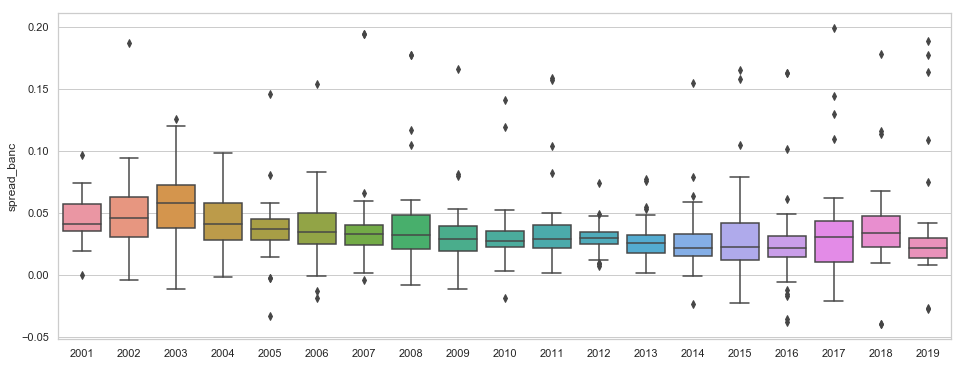

In [47]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
sns.boxplot(filtrado.index, filtrado.spread_banc)

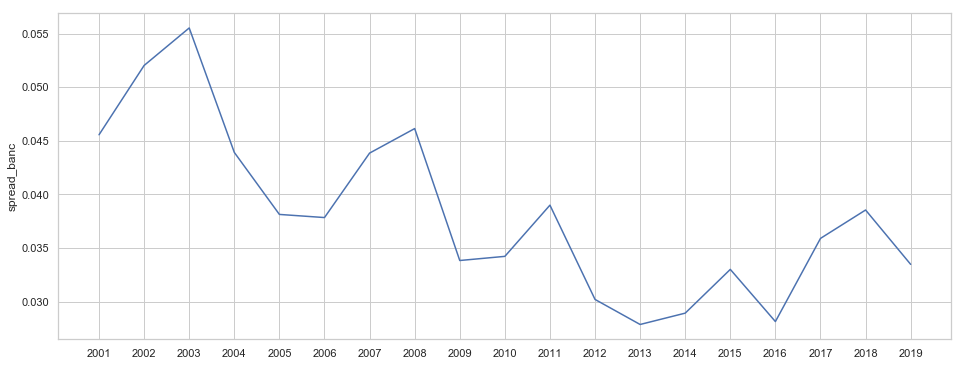

In [56]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
filtrado_mean=filtrado.spread_banc.groupby(filtrado.index).mean()
sns.lineplot(filtrado_mean.index.map(str), filtrado_mean)

In [ ]:
sns.lineplot(filtrado.index.map(str), filtrado)